In [11]:
source('helpers.R')

In [2]:
prepost <- readRDS("../../../ProcessedData/seurat/annotated_prepost_csf.rds")

In [3]:
nks <- subset(prepost, cell_type=='NK')

In [ ]:
nks <- preprocess_seurat_object(nks,  g2m_genes, s_genes, nfeatures = 4000, phase_threshold = 1)
nks <- RunHarmony(nks, 'Batch', verbose = FALSE)
nks <- FindNeighbors(nks, reduction = "harmony", dims = 1:10)
nks <- FindClusters(nks, resolution = .2, cluster.name = "harmony_clusters", algorithm = 1)
nks <- RunUMAP(nks, reduction = "harmony", dims = 1:10, verbose=F, reduction.name = "umap.harmony", 
                   spread=1, min.dist=.3, n.neighbors = 40, metric='cosine')

In [13]:
nks$NK_sub_type = 'Other_NK'
nks$NK_sub_type[nks$harmony_clusters == 1] = 'CD56dim_CD16pos_NK'
nks$NK_sub_type[nks$harmony_clusters %in% c(0,2,3)] = 'CCD56bright_CD16neg_NK'
nks$NK_sub_type[nks$harmony_clusters %in% c(4)] = 'ILC'

In [14]:
nks$NK_sub_type <- factor(nks$NK_sub_type, levels = c('CD56dim_CD16pos_NK', 'CCD56bright_CD16neg_NK', 'ILC'))

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's fill values."


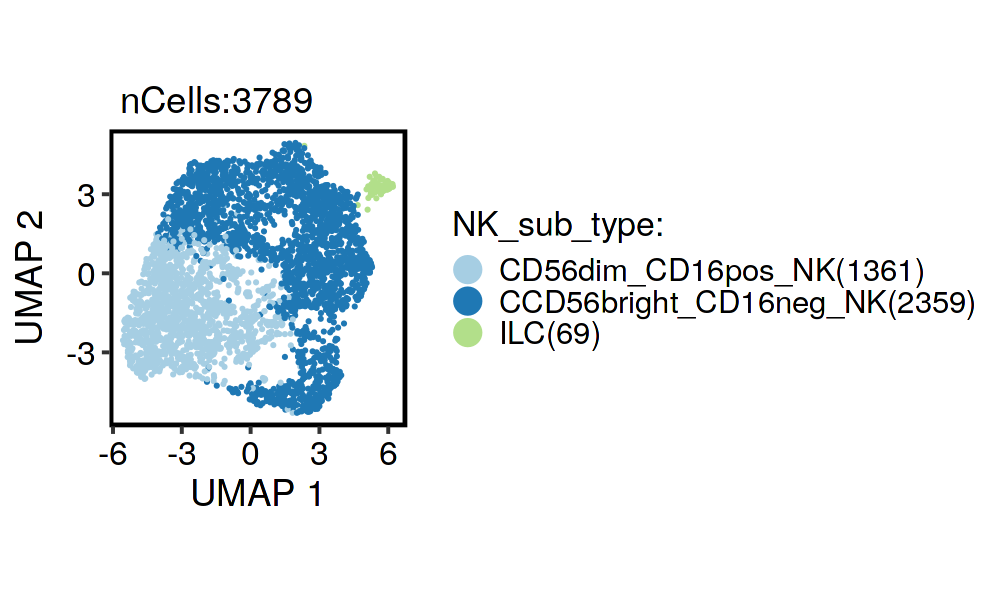

In [16]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res=200)
CellDimPlot(srt = nks, group.by = c( "NK_sub_type"), 
    label=F, label_insitu=T, label.fg = "black", label.bg = "white", label.bg.r = 0,label.size =2.8, label_repel = F, pt.size=0.1,
    ncol=2, reduction = "umap.harmony") & xlab('UMAP 1')  & ylab('UMAP 2') 


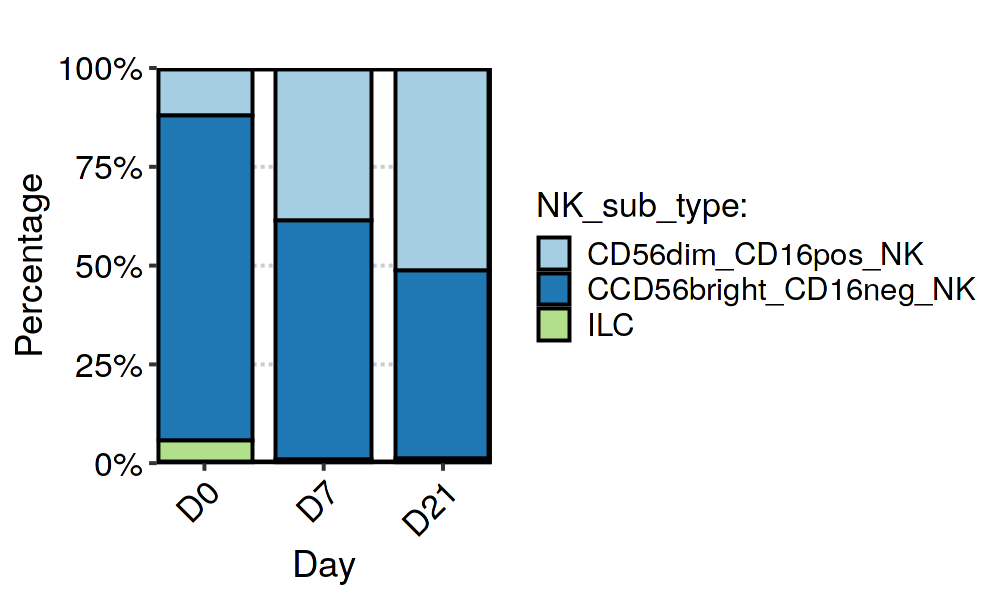

In [17]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res=200)
CellStatPlot(nks, stat.by = "NK_sub_type", group.by = "Day", label = F) 

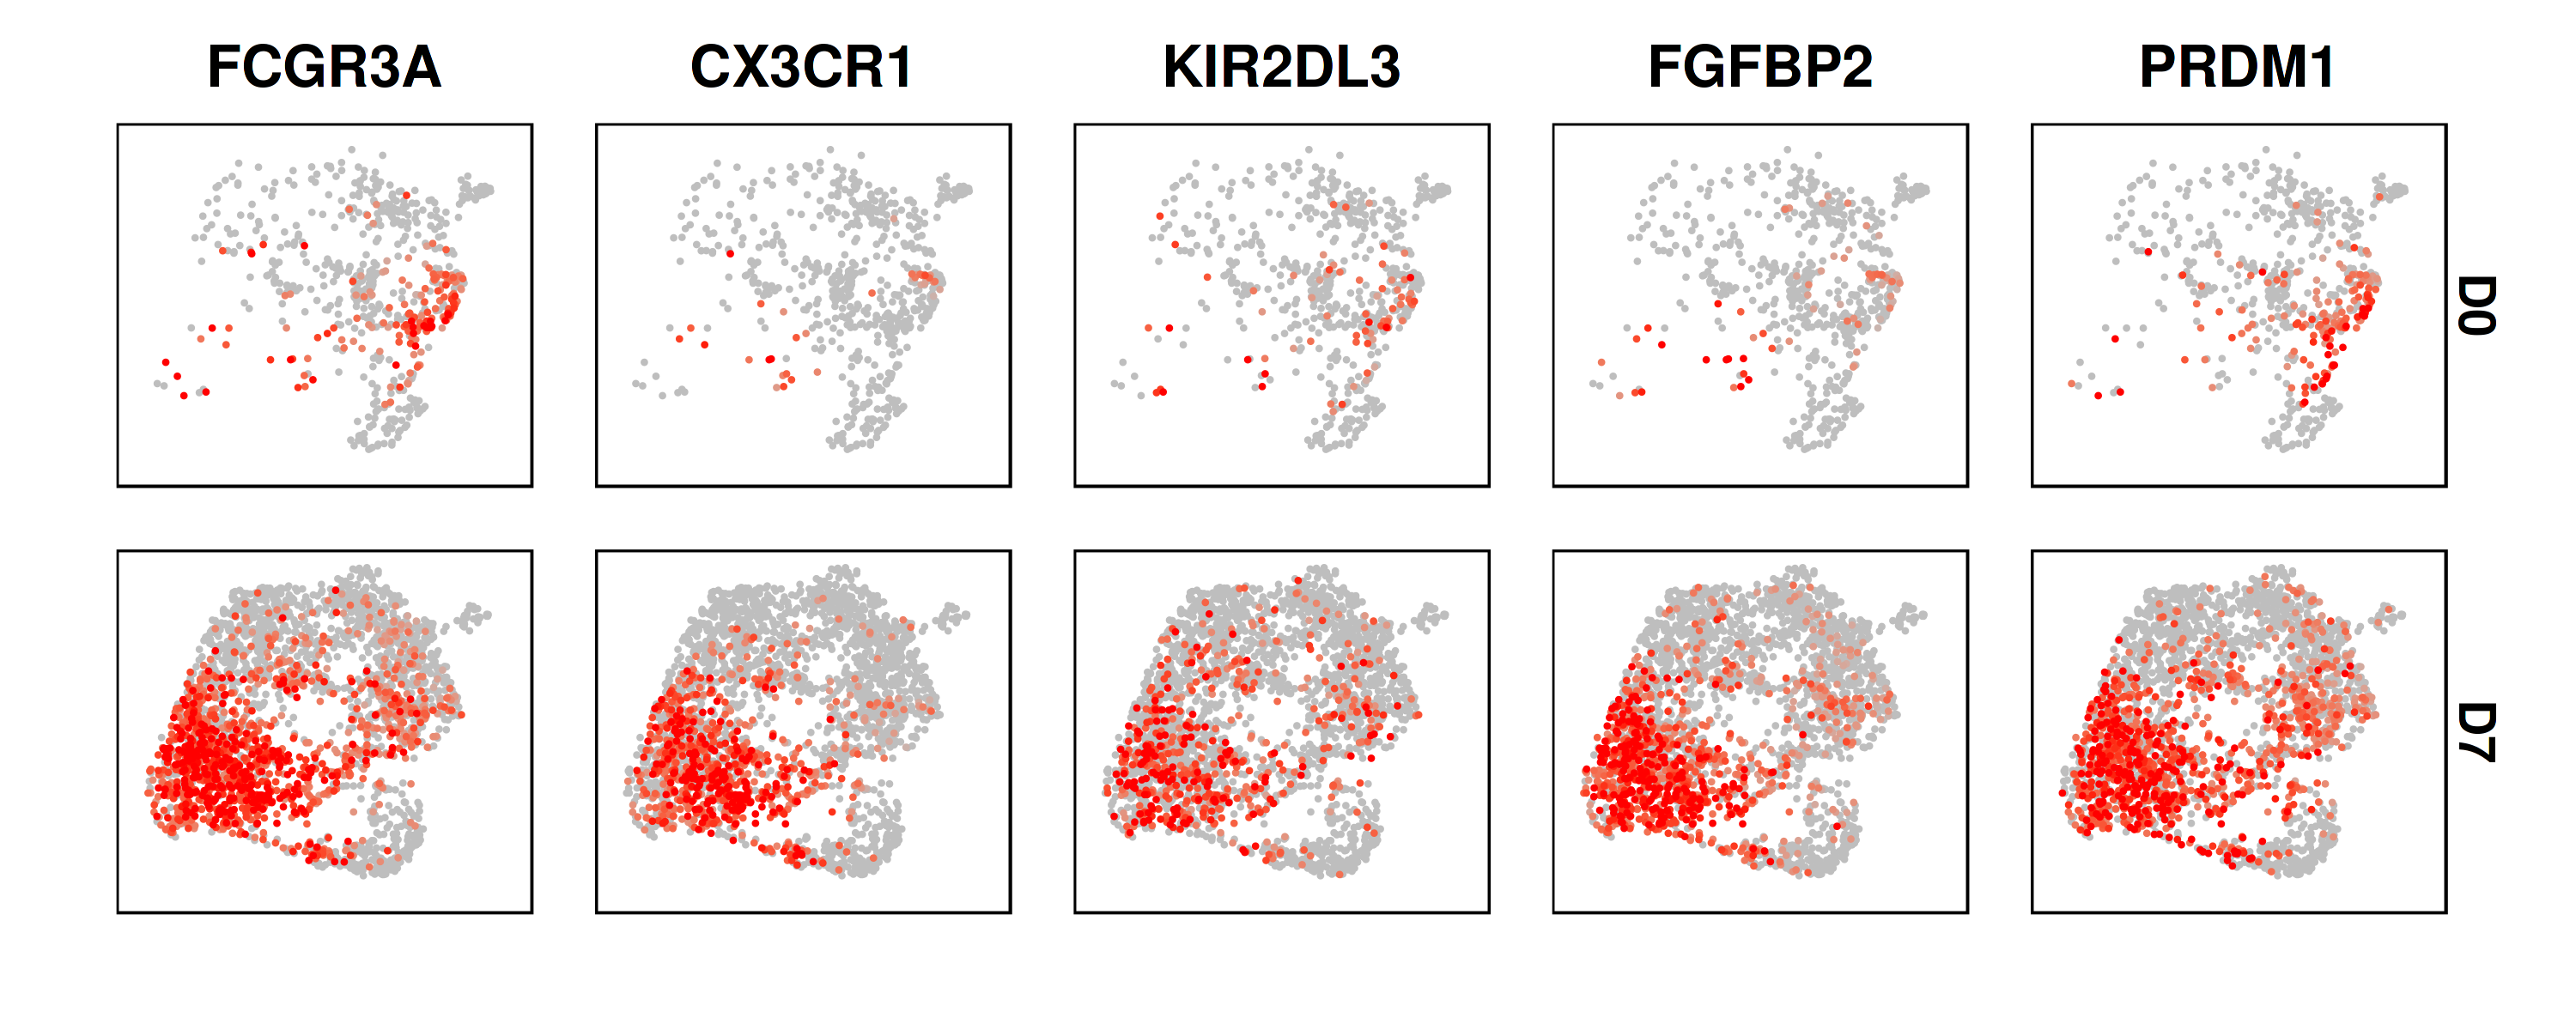

In [18]:
genes = c('FCGR3A','CX3CR1','KIR2DL3','FGFBP2','PRDM1') #'CXCR4', 

options(repr.plot.width = 2*length(genes), repr.plot.height =4 , repr.plot.res=300)
p <- FeaturePlot(subset(nks, Day %in% c('D0','D7')), features = genes, split.by = "Day",  cols = c("grey","red"), order=T, reduction = "umap.harmony",
             max.cutoff='q80', label = F, pt.size=0.1, by.col=F) & xlab('') & ylab('') & theme(
        axis.text=element_blank(),axis.line = element_blank(), 
        axis.ticks=element_blank())
p

In [19]:
nk_ilc_markers <- list(
  CD56dim_CD16pos_NK  = c(  "FCGR3A","FGFBP2", 'PRDM1', 'CX3CR1', "CCL3", "CCL4", "KIR3DL2", "KIR2DL3" ),
  CD56bright_CD16neg_NK = c( "NCAM1",  "XCL1", "XCL2",  "GZMK", "KLRC1","SELL"),
  ILC = c(     "GATA3", "RORC", "IL23R", "KIT", "CCR6", "IL1R1")
) 

In [22]:
Idents(nks) <- 'NK_sub_type'

Warning message:
"Scaling data with a low number of groups may produce misleading results"


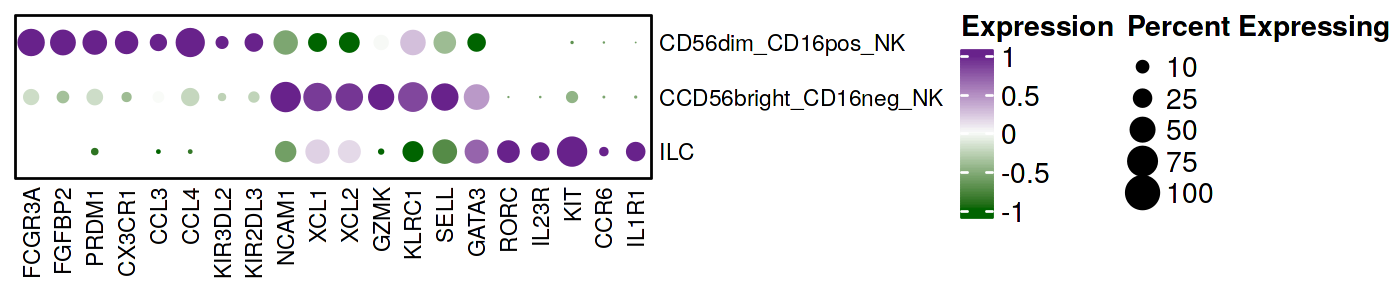

In [23]:
options(repr.plot.width = 7, repr.plot.height = 1.5, repr.plot.res=200)
P <- Clustered_DotPlot(nks,  features = unlist(nk_ilc_markers, use.names = FALSE), k = 1, x_lab_rotate=90,
        cluster_feature = F, cluster_ident = F, flip=T, exp_color_max=1, exp_color_min=-1,  
        show_ident_colors=F,  colors_use_exp = colorRampPalette(c("darkgreen","white","darkorchid4"))(50)) 

In [21]:
saveRDS(nks, "../ProcessedData/seurat/nks_final.rds")